# Data Analysis

#### Imports:

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.utils.plot_utils import hist, count, scatter

## Loading Dataframe and showing some  basic statistics for each feature::

In [2]:
# basic data analysis - see https://www.kaggle.com/code/antoniosabatini/tiktok-popularity-track-eda-ml-models/notebook
# for info on audio features see https://developer.spotify.com/documentation/web-api/reference/get-audio-features

CSV_PATH = '../data/audio_features.csv'

df = pd.read_csv(CSV_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         3932 non-null   object 
 1   track_pop          3932 non-null   int64  
 2   artist             3932 non-null   object 
 3   artist_pop         3932 non-null   int64  
 4   album              3932 non-null   object 
 5   danceability       3932 non-null   float64
 6   energy             3932 non-null   float64
 7   key                3932 non-null   float64
 8   loudness           3932 non-null   float64
 9   mode               3932 non-null   float64
 10  speechiness        3932 non-null   float64
 11  acousticness       3932 non-null   float64
 12  instrumentalness   3932 non-null   float64
 13  liveness           3932 non-null   float64
 14  valence            3932 non-null   float64
 15  tempo              3932 non-null   float64
 16  id                 3932 

In [3]:
#dicard string type features
df = df.drop(['track_name', 'artist', 'album', 'id', 'song_name', 'artist_name'], axis = 1, errors='ignore')

# basic statistics
df.describe()

         track_pop   artist_pop  danceability       energy          key  \
count  3932.000000  3932.000000   3932.000000  3932.000000  3932.000000   
mean     39.534079    53.755849      0.684398     0.629991     5.259156   
std      27.037639    22.152220      0.159415     0.200178     3.648960   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%      12.000000    39.000000      0.587000     0.503750     2.000000   
50%      44.000000    56.000000      0.710000     0.656000     5.000000   
75%      62.000000    71.000000      0.802000     0.782000     9.000000   
max      95.000000   100.000000      0.985000     1.000000    11.000000   

         loudness         mode  speechiness  acousticness  instrumentalness  \
count  3932.00000  3932.000000  3932.000000   3932.000000       3932.000000   
mean     -7.13396     0.565107     0.109868      0.304975          0.082582   
std       3.89145     0.495806     0.113087      0.286771          0.232230   
min     

In [4]:
# Count the number of unique values in each column
print((df.nunique()/len(df)).sort_values())

mode                 0.000509
time_signature       0.001272
key                  0.003052
artist_pop           0.023906
track_pop            0.024415
danceability         0.179552
energy               0.216938
valence              0.247457
liveness             0.255341
speechiness          0.270855
instrumentalness     0.421414
acousticness         0.441251
number_of_videos     0.754578
loudness             0.823754
tempo                0.901322
duration_ms          0.949644
rolloff              0.990590
zcr                  0.990844
rmse                 0.993133
chroma_stft          0.993642
spec_cent            0.993642
spec_bw              0.993642
mfcc                 0.993642
total_likes_count    1.000000
dtype: float64


## Distribution of TikTok popularity

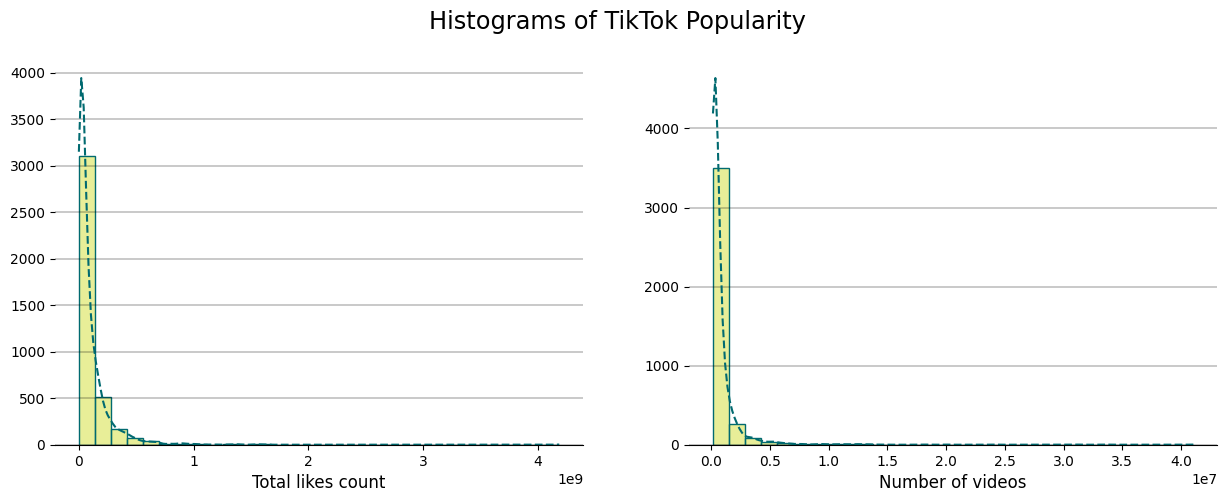

In [5]:
cols = ['total_likes_count', 'number_of_videos']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(cols):

    row_index = i // 3

    hist(df, col, axs[i])

fig.suptitle("Histograms of TikTok Popularity", fontsize="xx-large")

plt.show()

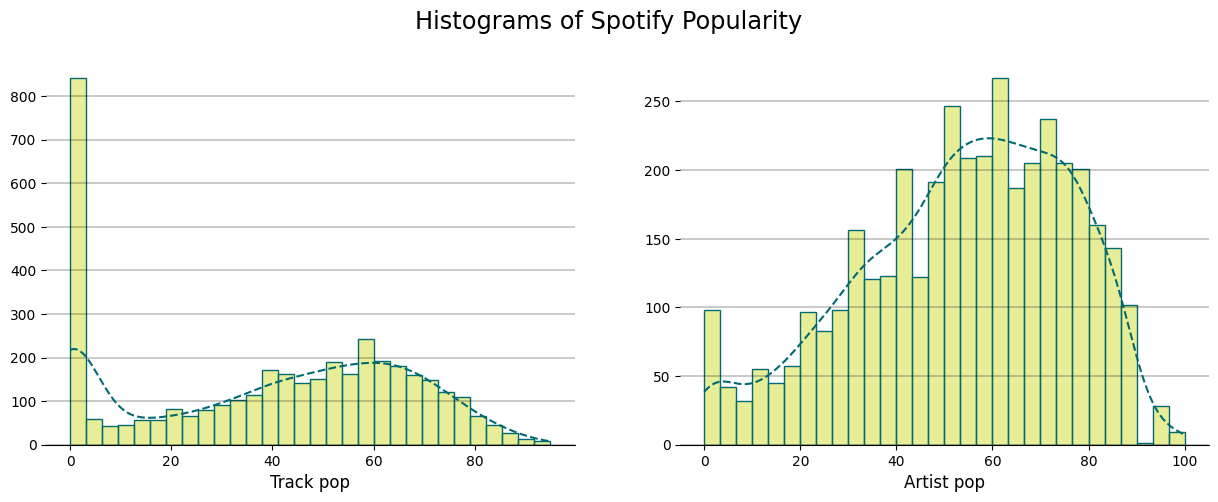

In [6]:
cols = ['track_pop', 'artist_pop']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(cols):

    row_index = i // 3

    hist(df, col, axs[i])

fig.suptitle("Histograms of Spotify Popularity", fontsize="xx-large")

plt.show()

## Distribution of Features

### Distribution graphs for the features provided by Spotify API:

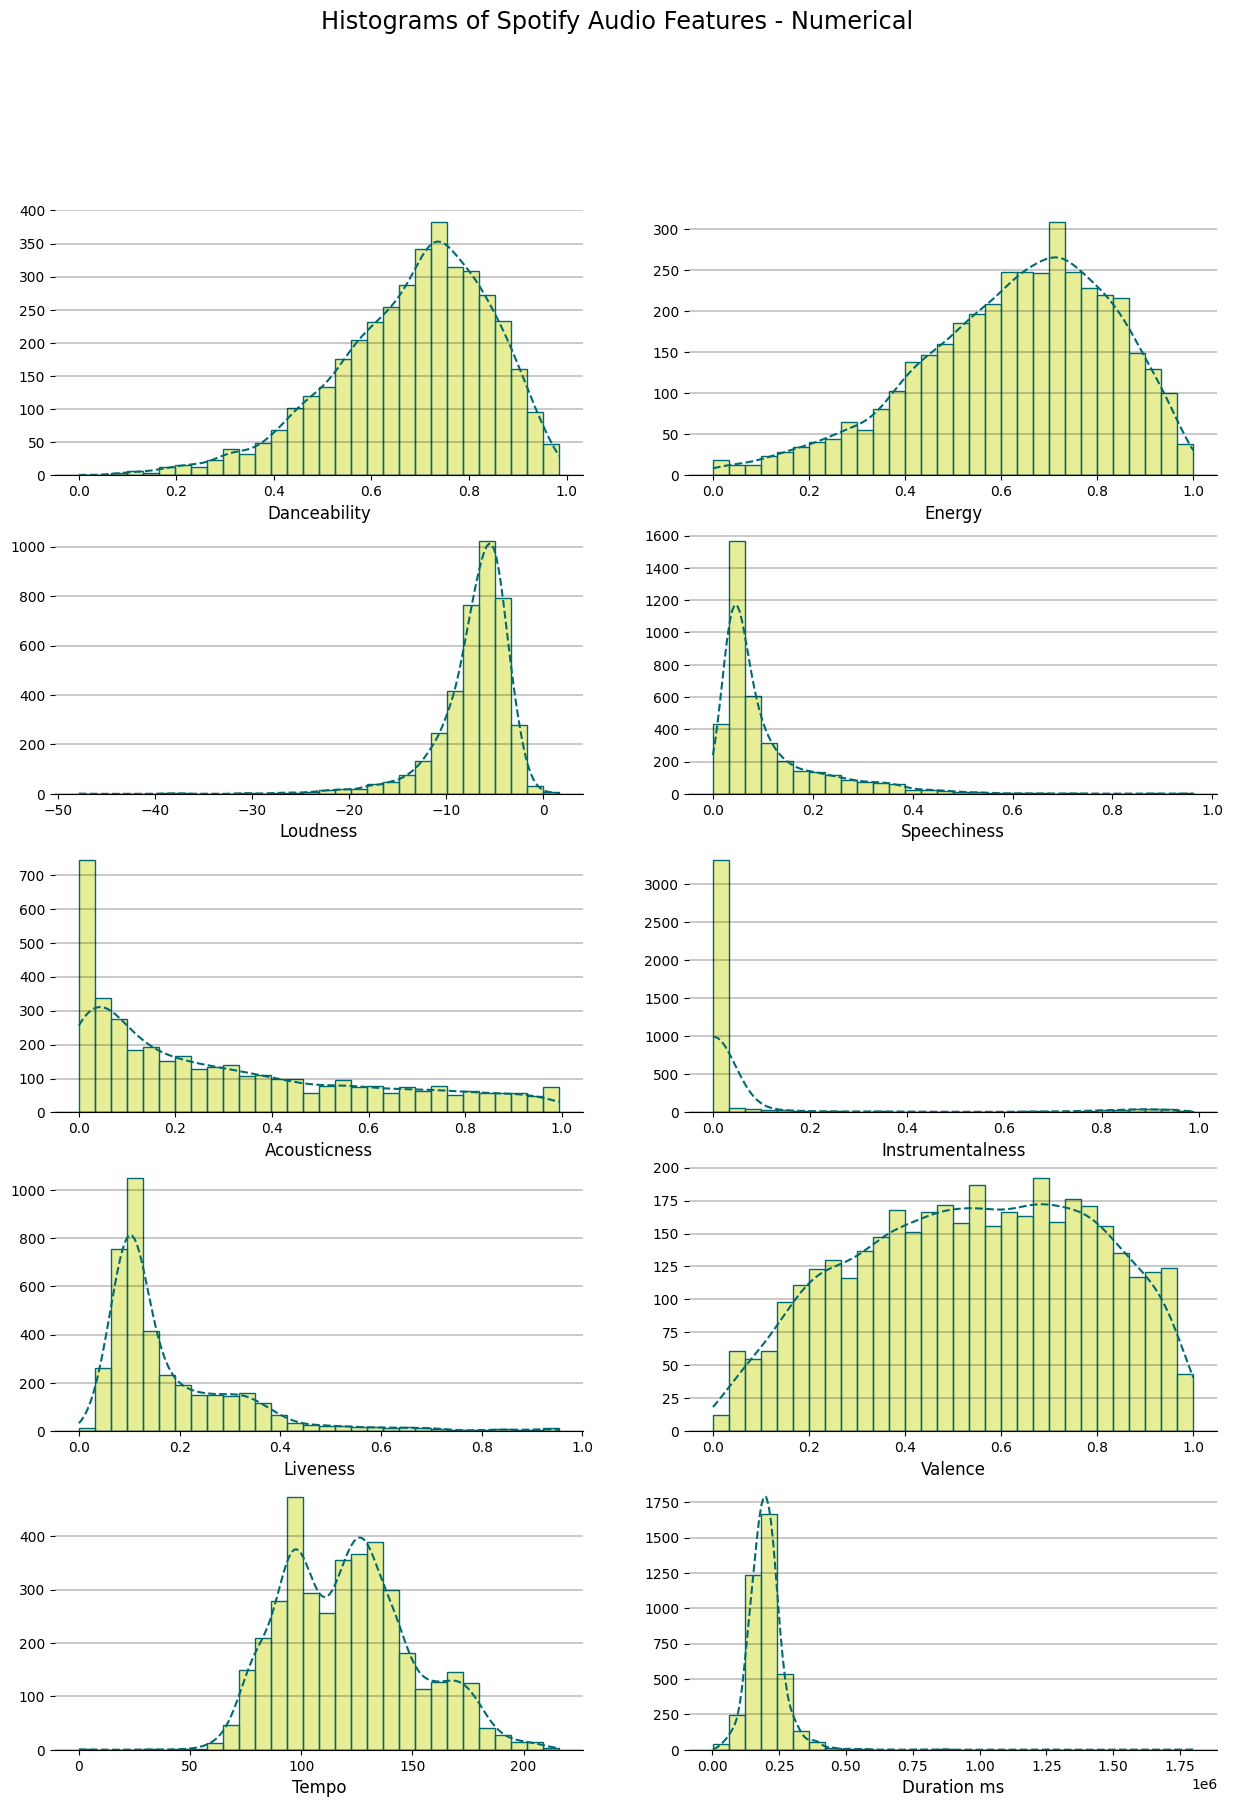

In [14]:
# distribution graphs for the numerical columns

cols = ['danceability', 'energy',
        'loudness', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5,2, figsize=(15, 20))

for i, col in enumerate(cols):

    row_index = i // 2
    col_index = i % 2

    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of Spotify Audio Features - Numerical", fontsize="xx-large")

plt.show()


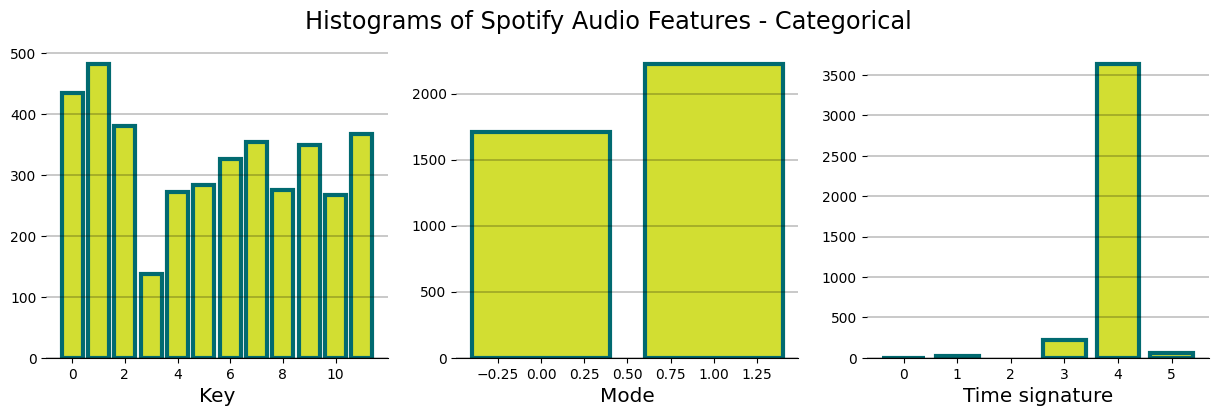

In [15]:
# distribution graphs for categorical columns

cols = ['key', 'mode', 'time_signature']

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(cols):

    count(df, col, ax[i])

fig.suptitle("Histograms of Spotify Audio Features - Categorical", size="xx-large")

plt.show()

Looking at these histograms, we can see that the songs in this dataset, which all have a substantial presence on TikTok (with over 100,000 videos), share some common characteristics: 

- They are energetic, high tempo, loud, and danceable. 

- They are mainly music, as opposed to speech. 

- They are not very long, usually under 5 minutes. 

- They are usually recorded in a studio, not in live settings. 

- They are not entirely acoustic. 

- They overwhelmingly incorporate lyrics, making them non-instrumental. 

- Nearly all follow a regular 4/4 beat. 

### Distribution graphs for features we extracted from the audio:

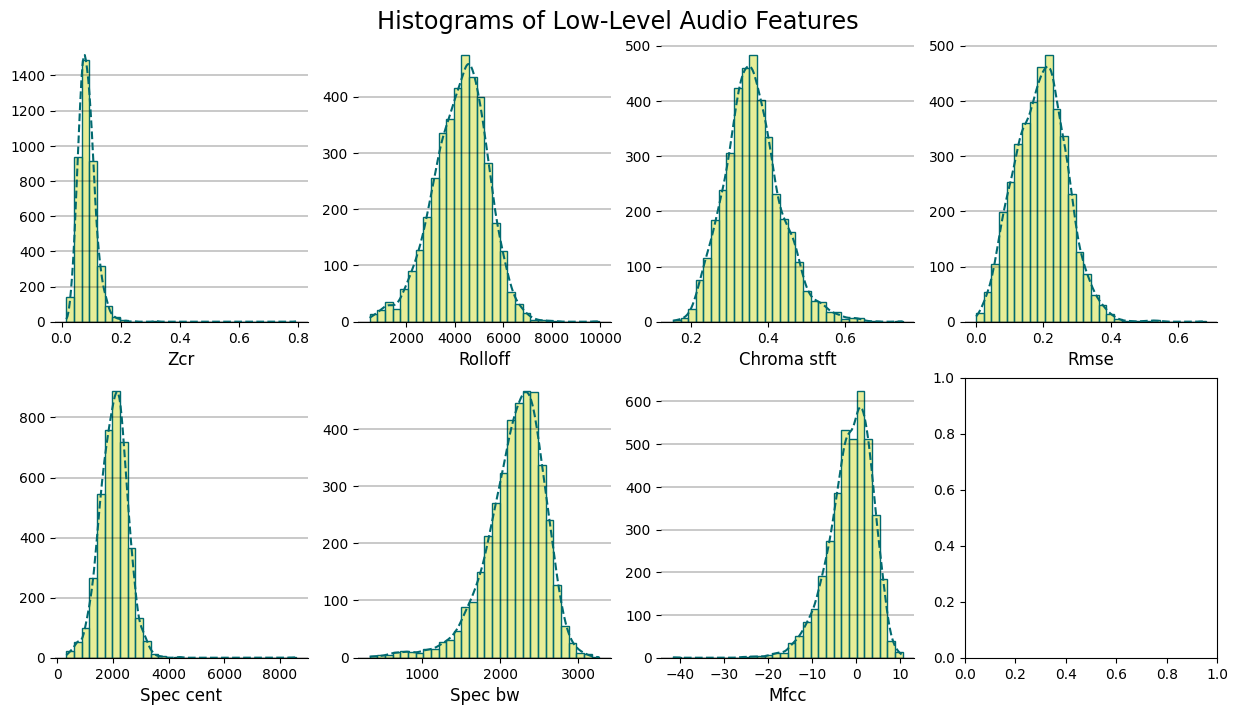

In [18]:
cols = ['zcr','rolloff','chroma_stft','rmse','spec_cent','spec_bw','mfcc']

fig, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, col in enumerate(cols):

    row_index = i // 4
    col_index = i % 4

    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of Low-Level Audio Features", fontsize="xx-large", y=0.92)

plt.show()

## Correlation between all pairs:

We will now see the correlation between all pairs of features:

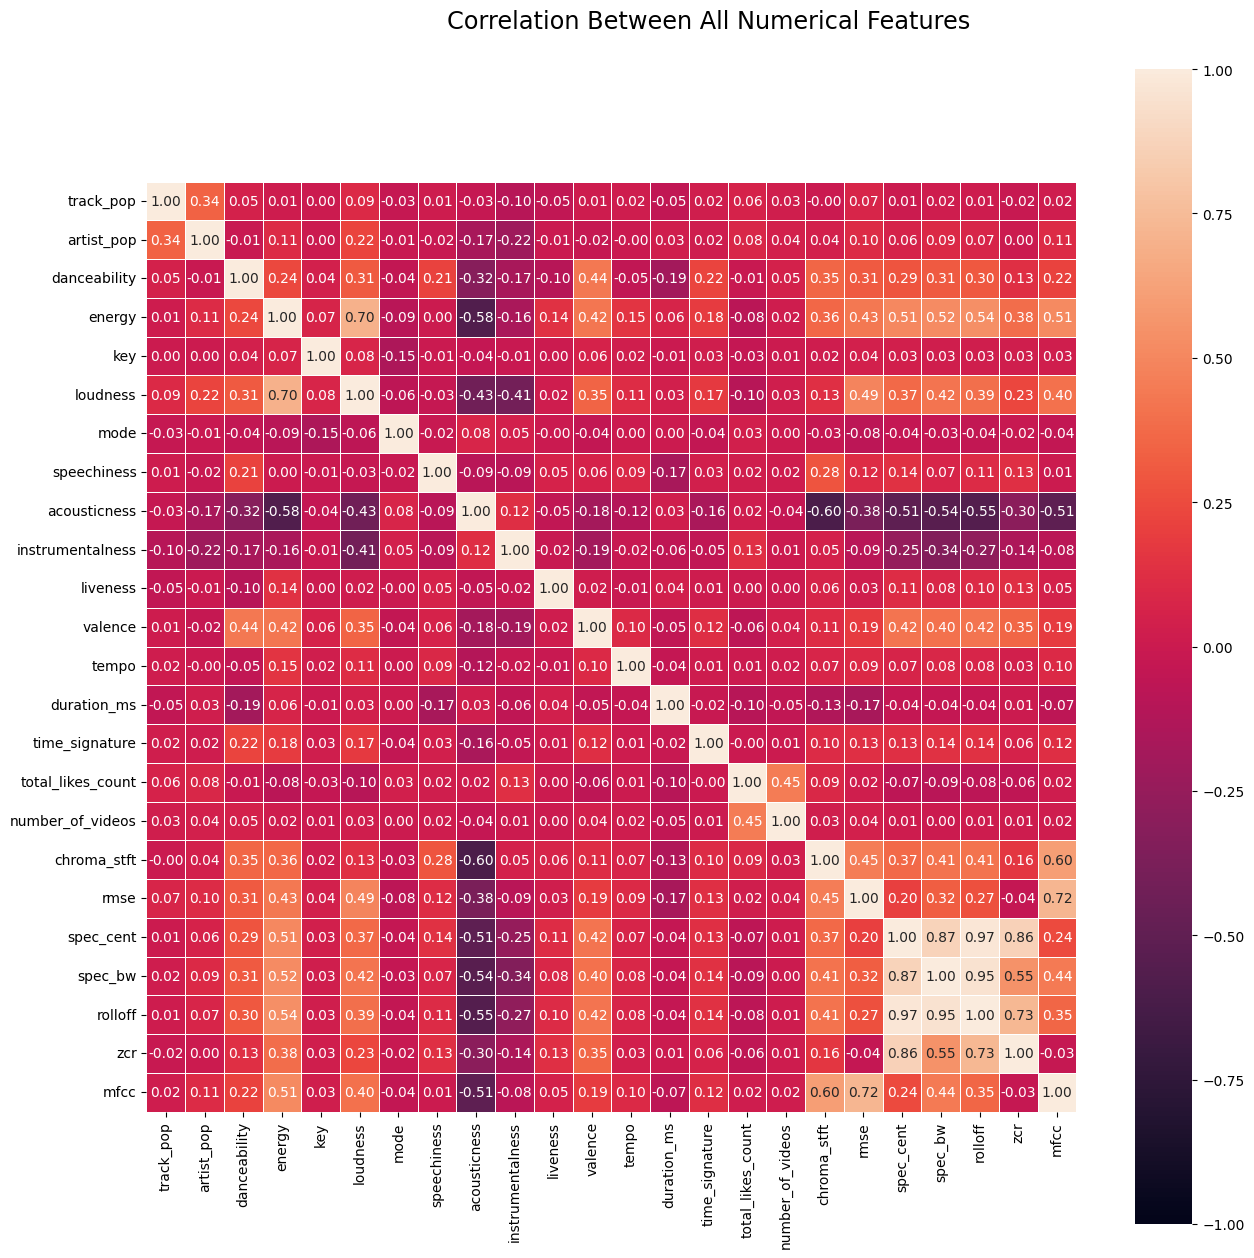

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = df.corr()

sns.heatmap(corr, annot=True, ax=ax, square=True, linewidth=.5, vmin=-1, vmax=1, fmt=".2f")

fig.suptitle("Correlation Between All Numerical Features", fontsize="xx-large", y=0.92)

plt.show()


Some takeaways: 

- Spotify's artist popularity metric demonstrates a strong correlation with track popularity, suggesting an interconnectedness between an artist's and a track's appeal on Spotify. 

- The total number of TikTok likes exhibits a notable correlation with the total count of videos, indicating a clear association between user engagement and content creation. 

- Spectral centroid is highly correlated with spectral roll off and bandwidth: This makes sense because the spectral centroid is influenced by the distribution of frequencies in the spectrum. If most of the energy is concentrated in the high-frequency region (as indicated by a high spectral roll-off and wide spectral bandwidth), the spectral centroid will tend to be higher. Conversely, if the spectral content is concentrated in the low-frequency region, the centroid will be lower. 

- Zero crossing rate is highly correlated with spectral centroid - Zero-crossing rate is related to the rapid changes in the signal's amplitude. When there are rapid changes (high zero-crossing rate), it often indicates a higher presence of high-frequency components, which can also affect spectral roll-off, spectral bandwidth, and spectral centroid. 

- Intriguingly, none of the popularity metrics display significant correlations with any of the audio features. 

### Looking Closer at the correlation of number of tiktoks with spotify track popularity and spotify artist popularity


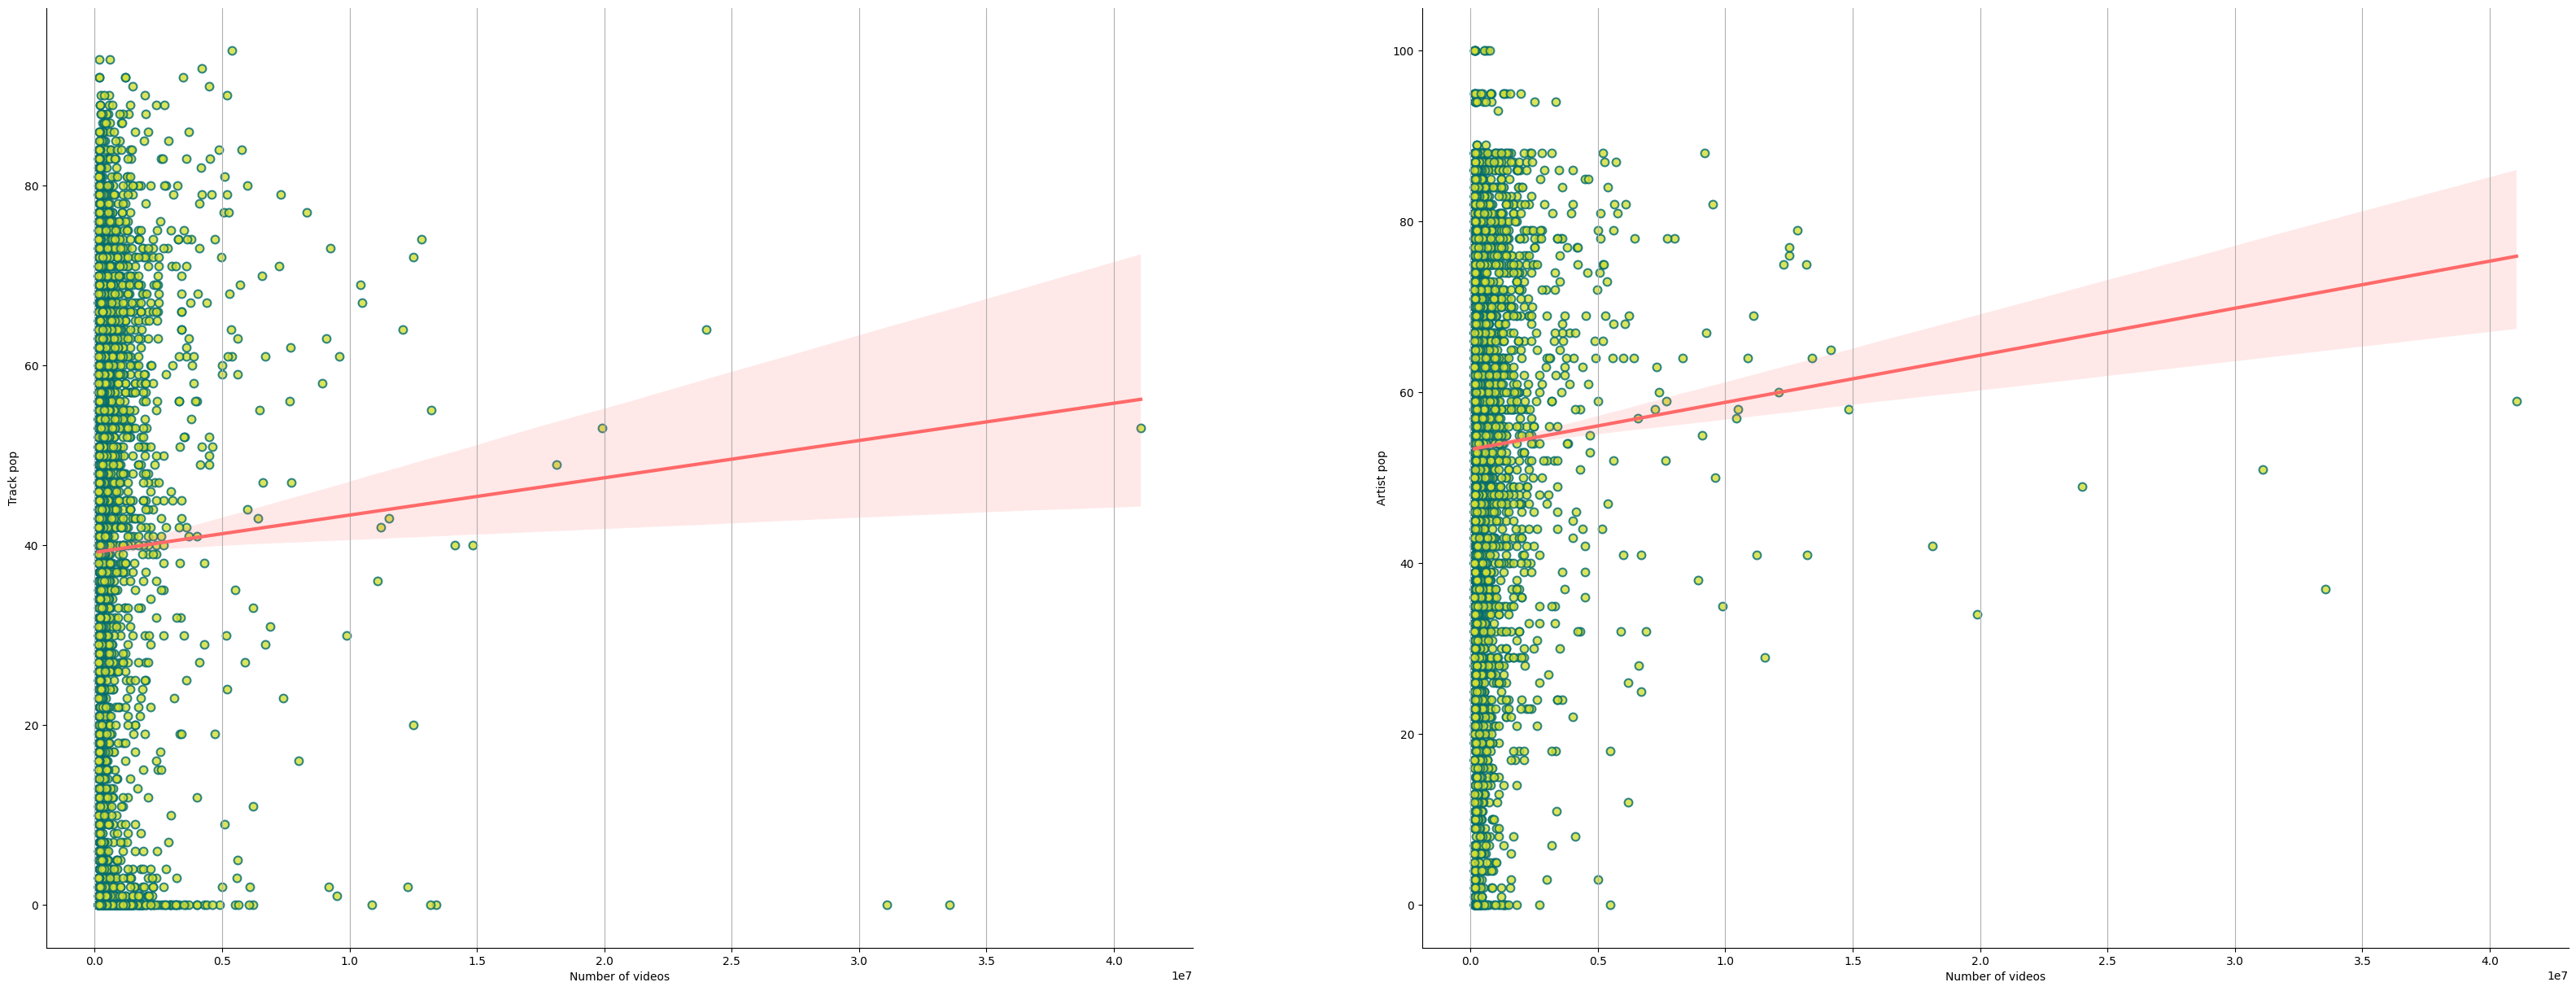

In [11]:
cols = ['track_pop', 'artist_pop']
fig, axs = plt.subplots(1,2,  figsize=(40, 15))

for i, col in enumerate(cols):

    col_index = i

    ax = axs[col_index]

    scatter(df, 'number_of_videos', col, ax)


plt.show()


We can see that interestingly there is no strong correlation between popularity on spotify and popularity on tik tok.

## Finding a good threshold for virality

In [13]:
# check how many songs have over 500000 videos
print(df[df['number_of_videos'] > 500000].shape[0])

# below 100000
print(df[df['number_of_videos'] < 500000].shape[0])

1416
2516
